In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# CSV'yi oku (notebooks klasöründen bir üstteki data klasörü)
df = pd.read_csv("../data/synthetic_wvtr.csv")

df.head()


,Temperature_C,RelativeHumidity_%,CoatingWeight_gm2,WVTR_gm2_day
0,22.458847,43.885177,24.282213,1.322591e+05
1,58.112149,69.901671,21.022068,3.922970e+06
2,28.516804,90.920558,48.954710,2.353894e+05
3,42.773373,50.851808,49.998082,3.977164e+05
4,56.509085,66.327624,52.283292,1.301386e+06


In [2]:
X = df[["Temperature_C", "RelativeHumidity_%",
        "CoatingWeight_gm2"]]
y = df["WVTR_gm2_day"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

model = RandomForestRegressor(n_estimators=300, random_state=0)
model.fit(X_train, y_train)

preds = model.predict(X_test)

print("R² Score:", r2_score(y_test, preds))
print("MAE:", mean_absolute_error(y_test, preds))


R² Score: 0.9835021217097314
MAE: 72531.93744957476


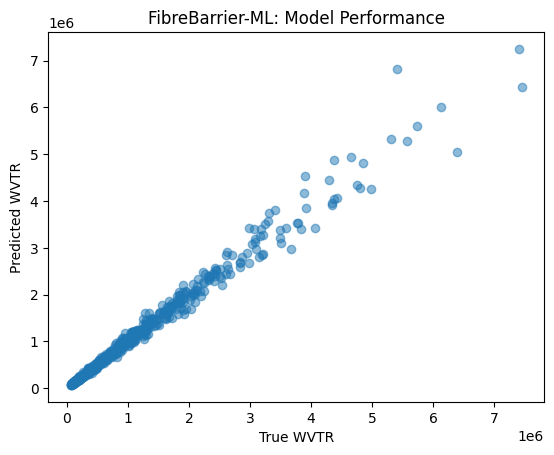

In [3]:
plt.scatter(y_test, preds, alpha=0.5)
plt.xlabel("True WVTR")
plt.ylabel("Predicted WVTR")
plt.title("FibreBarrier-ML: Model Performance")
plt.show()
